# Computer Vision - P5

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P5_Student1_Student2.zip** that includes:
    - The notebook P5_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): December 11th, 23:00 h** 

==============================================================================================
## Practicum 5: Image search using textures


==============================================================================================



The exercises of this notebook will show how we can perform image similarity search using:

- Gaussian filters
- Descriptors based on texture and color

#### Problem we want to solve
- Given a query image **$x$** and a set of images **$X$** we would like to retreive the most similar to **$x$** images from  **$X$**.



 The function should return a feature vector obtained by averaging each filter response on the image.  

**Hint**: Note that since at this moment we are focusing on the texture, we will not use the color of the images.

## Looking at the images

In [5]:
%matplotlib inline

import time
import scipy
import numpy as np
import skimage
from skimage import filters
from skimage import io
from scipy import ndimage
from skimage.color import rgb2gray
import os

import matplotlib.pyplot as plt

In [6]:
path = "./images/texturesimages/buildings/"
building_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

path = "./images/texturesimages/forest/"
forest_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

path = "./images/texturesimages/sunset/"
sunset_images = [skimage.io.imread(path + f) for f in os.listdir(path)]

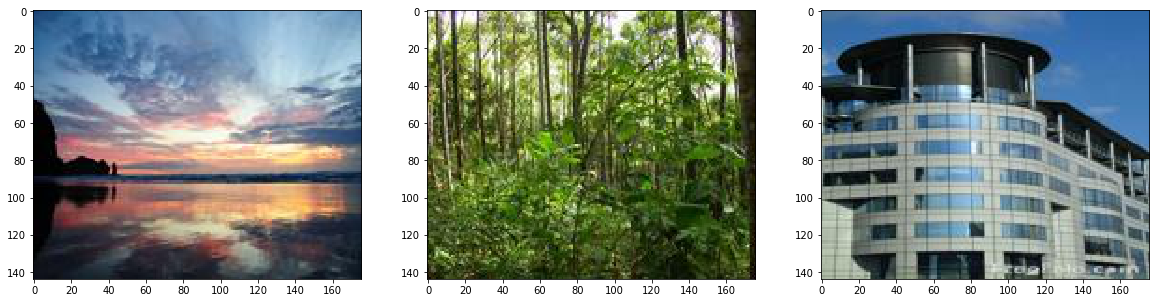

In [7]:
fig, ax= plt.subplots(ncols=3, nrows=1, figsize=(20,30))

ax[0].imshow(sunset_images[0])
ax[1].imshow(forest_images[0])
ax[2].imshow(building_images[0])
plt.show()

In [8]:
len(sunset_images), len(forest_images), len(sunset_images)

(30, 30, 30)

# Filter banks

We can apply a collection of multiple filters that we call a filter bank. Note that if we apply $D$ filters our feature vectors will be $D$ dimensional.

The following image shows a filter bank. In the filter bank we typically want filters to capture a combination of scales, orientations of different types of patterns. This particular filter bank is The Leung-Malik (LM) Filter Bank.

<img src="./images_notebook/filter_bank.png">


## Leung-Malik (LM) Filter Bank

In [9]:
import LM_filters

LM filters imported, the shape of the filter bank is:  (49, 49, 48)


In [10]:
filter_bank = LM_filters.makeLMfilters()
filter_bank.shape

(49, 49, 48)

### Plotting all filters

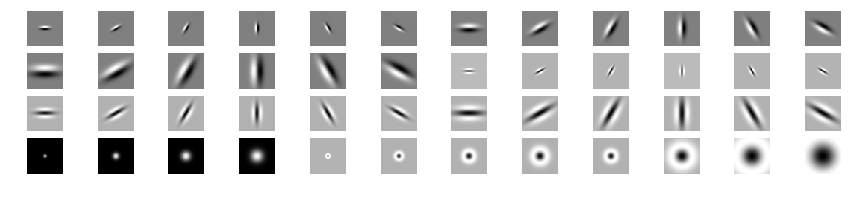

In [11]:
n_filters = filter_bank.shape[-1]

fig, ax = plt.subplots(ncols=12, nrows=4, figsize=(15,3))

k = 0
for i in range(4):
    for j in range(12):
        ax[i,j].imshow(filter_bank[:,:,k], cmap = 'gray')
        ax[i,j].axis("off")
        k = k + 1


## Exercise 5.1 Plot the convolved image by some of the filters


Make a function `visualize_features(im,  filter_bank, n_filters=5)` that recieves the `filter_bank`, an image `im` and an integer `n_filters`. 

The function  must make a plot of two rows containing in the first row, in position $k$, the image convolved by filter $k$. In the second row, in position $k$, the image of the k'th filter. The result for `n_filter=5` should look like 


<img src="./images/filters.png">


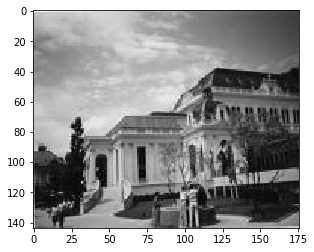

In [12]:
im = building_images[5]
im = skimage.color.rgb2gray(im)
plt.imshow(im, cmap="gray")

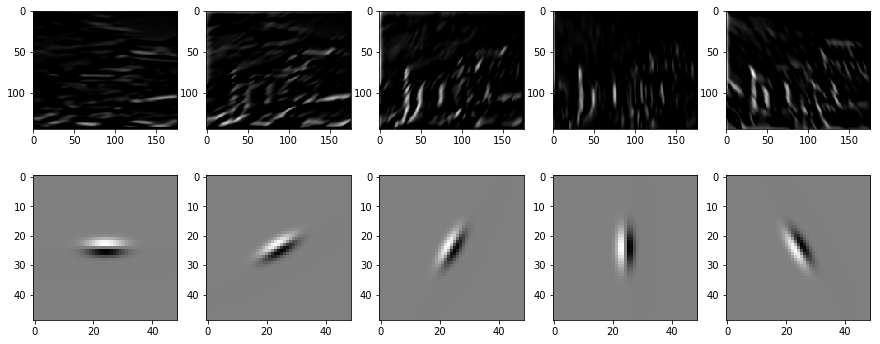

In [13]:
def visualize_features(im,  filter_bank, n_filters=5):
    fig, ax = plt.subplots(ncols=n_filters, nrows=2, figsize=(15,6))
    # complete this function
    
    # For every possible filter we have to convolve each filter to the image and
    # after that plot it
    for i in range(0,n_filters):
        convolved = ndimage.convolve(im,filter_bank[:,:,i], mode='constant', cval=0.0)
        ax[0][i].imshow(convolved, cmap  = 'gray',vmin = 0)
        ax[1][i].imshow(filter_bank[:,:,i], cmap  = 'gray')
        filter_bank[i]

visualize_features(im, filter_bank)


## Exercise 5.2 Constructing a feature vector for a given image


Given $D$ filters from the filter bank and a single image `image`, make a function `features_from_filter_bank(image, filter_bank, n_filters)` that returns a feature vector of shape `n_filters`. The returned vector must contain at position $k$ the mean of the absolute value of the convolved image by filter $k$.

$$
\text{feat}(x) = \left( \text{mean}( |r_1|), \dots,\text{mean}(|r_D|) \right)
$$



In [14]:
im = skimage.color.rgb2gray(building_images[0])

# In order to create the feature vector for the given image, first we need to 
# apply every n_filters filters from the filter_bank by using ndimage.convolve.
# After that, we need to store the mean for the absolute value of the convolved 
# image.

def features_from_filter_bank(image, filter_bank, n_filters):
    ## Complete this function
    im_conv = np.zeros(image.shape)
    features_for_im = np.zeros(n_filters)
    for n in range(0,n_filters):
        n_filter = filter_bank[:,:,n]
        
        convolved = ndimage.convolve(image,n_filter, mode='constant', cval=0.0)
        value_f = np.mean(abs(convolved))
        features_for_im[n] = value_f
        
    return features_for_im

features_for_im = features_from_filter_bank(im, filter_bank, n_filters)

print(features_for_im)

[2.44690087e-02 1.85410385e-02 1.48703795e-02 1.72853850e-02
 1.65312666e-02 2.18480746e-02 1.46767540e-02 9.70120849e-03
 8.83472152e-03 1.02757299e-02 9.57368610e-03 1.13925030e-02
 8.89737772e-03 7.00583565e-03 6.70066582e-03 7.31450056e-03
 7.12251863e-03 7.79182736e-03 1.38684497e-02 7.25502369e-03
 5.82522583e-03 1.05535769e-02 6.85351077e-03 9.37954169e-03
 5.14435432e-03 2.24675921e-03 1.73404960e-03 3.18859704e-03
 1.98982061e-03 3.09331459e-03 2.14591554e-03 9.67612743e-04
 9.30667424e-04 1.51842200e-03 1.01370705e-03 1.29914461e-03
 1.56620901e+00 3.08544832e+00 4.56131628e+00 5.99568677e+00
 7.70826971e-01 3.74291463e-01 2.42484851e-01 1.76699202e-01
 2.42484851e-01 1.03062585e-01 3.02200259e-02 3.03043772e-03]


## Exercise 5.3 Constructing the matrix of the feature vectors for all images

Implement a function `get_class_Features(all_images, filter_bank)` that applies `features_from_filter_bank` to get a feature vector for each of the images in the union of the three datasets (forest, buildings, sunset). It must return a matrix containing at row $k$ feature vector for the input image $k$.


Wall time: 7min 49s

In [15]:
all_images = building_images + forest_images + sunset_images

In [17]:
%%time

def get_class_features(all_images,  filter_bank):

    n_images = len(all_images)
    n_filters = filter_bank.shape[-1]
    all_feature_vectors=np.zeros((n_images,filter_bank.shape[-1]))
    # Complete
    
    for i in range(0,n_images):
        f = features_from_filter_bank(skimage.color.rgb2gray(all_images[i]), filter_bank, n_filters)
        all_feature_vectors[i] = f
    return all_feature_vectors

all_feature_vectors=get_class_features(all_images,  filter_bank)

Wall time: 6min 42s


In [24]:
import pickle
"""
Because filling the all_feature_vectors is a long process, we 
thought that storing its result will avoid repeating this process and 
wasting more time than the necessary.

This is for the saving process:

with open('filename.pickle', 'wb') as handle:
    pickle.dump(all_feature_vectors, handle, protocol=pickle.HIGHEST_PROTOCOL)

And this is for the loading process: 

with open('filename.pickle', 'rb') as handle:
    all_f_vectors = pickle.load(handle)
"""

with open('filename.pickle', 'wb') as handle:
    pickle.dump(all_feature_vectors, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Exercise 5.4 Visualizing the features of an image

Define a function `visualize_features` that given a feature index and an array containing all feature vectors, plots its values for the three datasets using different colors for each dataset (in total plots should contain 3 colors).


In [25]:
# Just like we said in the previous exercise, we stored the values of the all_feature_vectors in order to save time, so now 
# we need to load those values and use them.
with open('filename.pickle', 'rb') as handle:
    all_f_vectors = pickle.load(handle)
    
print(all_f_vectors)

[[0.02446901 0.01854104 0.01487038 ... 0.10306259 0.03022003 0.00303044]
 [0.01285695 0.01290691 0.01469189 ... 0.14130941 0.04109497 0.00356091]
 [0.01507398 0.01344742 0.01285276 ... 0.07235185 0.02069001 0.00280375]
 ...
 [0.00828009 0.00774793 0.00640236 ... 0.10726278 0.03189559 0.00262144]
 [0.01803881 0.01325548 0.01011925 ... 0.07753248 0.02313785 0.00280529]
 [0.01562744 0.01229639 0.00918285 ... 0.07504118 0.02210395 0.00177795]]


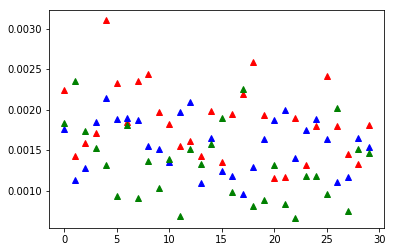

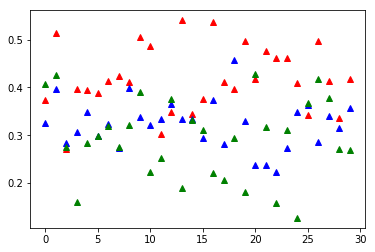

In [26]:
def visualize_features(k, all_feature_vectors):
    arr = []
    for i in all_feature_vectors:
        arr.append(i[k])
        x = np.arange(30)
    plt.plot(x, arr[:30], 'r^', x, arr[30:60], 'b^', x, arr[60:90], 'g^')
        
    plt.show()
   
    return None

visualize_features(25, all_f_vectors)    
visualize_features(41, all_f_vectors)





#### Similarity search

Let us assume $f(x) \in \mathbb{R}^D$ represents a set of features for $x$. Given a query image $x$ and another image $x^m$ from the database, we can compute the distance between images as
$$
\text{distance}\left( f(x) , \, f(x^m) \right) = \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 =  \sqrt{ \sum_{d=1}^\text{D} \left( f(x)_d - f(x^m)_d  \right)^2 }
$$

then we can find the closest image $x^{m^*}$ from the database to $x$ as $m^* =  \text{argmin}_{m} \{ \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 \}$


## Exercise 5.5 Retrieving the most similar and different images



Implement a function `retrieve_k_images_from_X(query, X, k)` where `query` is an image,  `X` ins the array containing the features from all the images and  `k` is an integer. The function should retrieve the `k` most similar and distant images (according to the l2 norm) and the distances from the closest and the furthest images to the query image. You can include the query image since it is in `X`.

- Make a plot with the first column beeing the query image and the other k columns the closest images in the feature space.

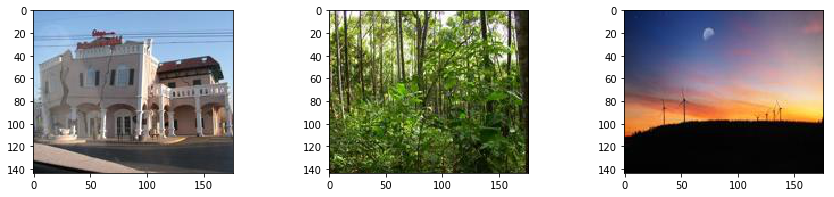

In [27]:
X = np.array(all_feature_vectors)
ind_1 = 6
ind_2 = 30
ind_3 = 65

query_1 = X[6, :]
query_2 = X[30,:]
query_3 = X[65,:]


# Display the query images
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,3))
ax[0].imshow(all_images[6]) 
ax[1].imshow(all_images[30])
ax[2].imshow(all_images[65])

In [18]:
def retrieve_k_images_from_X(query, X, k):
    #Complete
    distances = []
    closest_to_query = []
    closest_images = []
    
    images = []
    
    # This will fill the array images with tuples containing:
    # - The actual image we are working with 
    # - the euclidean distance between the query and the actual image.
    for pos,x in enumerate(X):
        images.append((all_images[pos],(np.linalg.norm(query-x))))
        
    # After filling all the images in the array we sort them by the distance value
    # and by doing so, the firsts ones are the nearests to the query image.
    images = sorted(images,key = lambda x: x[1])
    
    # This will get the k closest images to the query
    closest_to_query = images[:k]
    
    # While this will get the k furthest images to the query
    furthest_to_query = images[::-1]
    furthest_to_query = furthest_to_query[:k]
   
    for i in closest_to_query:
        closest_images.append(i[0])
        distances.append(i[1])
        
    for i in furthest_to_query[::-1]:    
        closest_images.append(i[0])
        distances.append(i[1])
    
    return closest_images, distances

                      QUERY                      


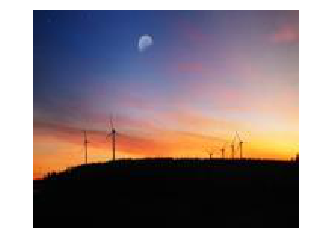

  Closest and Furthest images to Query  
Distance with query:  0.0


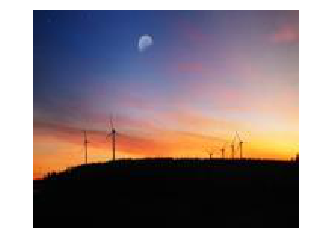

Distance with query:  0.04845246760890874


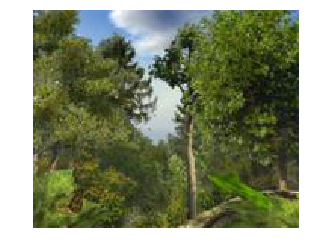

Distance with query:  0.05761435209475992


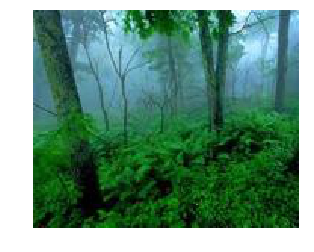

Distance with query:  0.09310818427666255


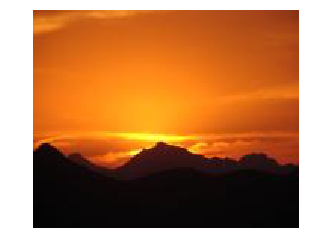

Distance with query:  4.61964677710075


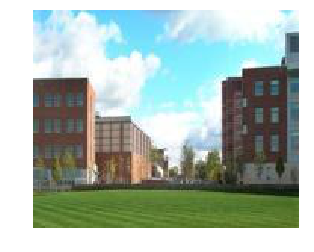

Distance with query:  4.798145906350319


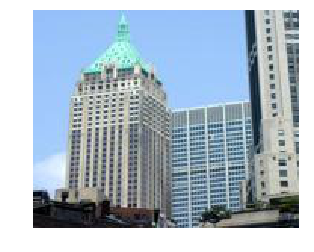

Distance with query:  5.353450989668091


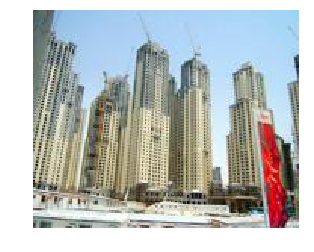

Distance with query:  5.410764482259721


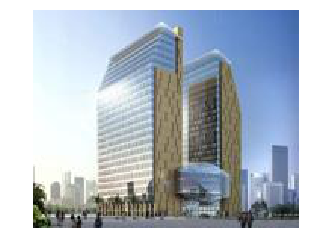

In [29]:
closest_imgs, dist = retrieve_k_images_from_X(query_3, X, 4)

print(chr(27)+"[0;44m"+"                      QUERY                      "+chr(27)+"[0m")
plt.imshow(all_images[65]) # query_1
plt.axis('off')
plt.show()

numerator = 0
print(chr(27)+"[0;42m"+"  Closest and Furthest images to Query  "+chr(27)+"[0m")
for i in closest_imgs:
    print("Distance with query: ", dist[numerator])
    plt.imshow(i)
    plt.axis('off')
    plt.show()
    
    numerator += 1


## Exercise 5.6 Retrieving the most similar image based on the information about color

Based on exercises 5.3 and 5.4:
1)  Implement a function `get_rgb_Features(all_images)` that obtains the RGB information by applying `exposure.histogram(image,nbins=32)` to get a feature vector for each of the images in the union of the three datasets (forest, buildings, sunset). It must return a matrix containing at row $k$ feature vector for the input image $k$.

2)  Use the same function `retrieve_k_images_from_X(query, X, k)` where `query` is an image, `X` ins the array containing the features from all the images and  `k` is an integer. The function should retrieve the `k` most similar and distant images (according to the l2 norm) and the distances from the closest and the furthest images to the query image. You can include the query image since it is in `X`.

- And again, make a plot with the first column beeing the query image and the other k columns the closest images in the feature space.

In [33]:
# First of all, we import the different libraries we're going to use

from skimage import exposure
from skimage import img_as_float

# Then we define the requested function with the proper parameters
def get_rgb_features(all_images):
    
    # Since the function has to return a matrix of k values corresponding to 
    # the k features of the all the images, we create a matrix MxM where M is the
    # total number of images we got.
    
    n_images = len(all_images)
    all_rgb_features = np.zeros((n_images*3,32*3))
        
    # Then, for every image, we turn them as a float in order to obtain its different
    # spectrums, in other words, the different vectors of values of their RGB, and 
    # store them inside the matrix we created previously. 
    for i in range(0,n_images-1):
        img = img_as_float(all_images[i])
        
        red_vector, red_bins = exposure.histogram(img[...,0], nbins = 32)
        green_vector, green_bins  = exposure.histogram(img[...,1], nbins = 32)
        blue_vector, blue_bins = exposure.histogram(img[...,2], nbins = 32)
        
        all_rgb_features[i][0] = red_vector
        all_rgb_features[i][1] = green_vector
        all_rgb_features[i][2] = blue_vector
        
    # Finally, we return the resultant matrix
    return all_rgb_features

closest_imgs, dist = retrieve_k_images_from_X(get_rgb_features(all_images), X, 4)

print(chr(27)+"[0;44m"+"                      QUERY                      "+chr(27)+"[0m")
plt.imshow(all_images[65]) # query_1
plt.axis('off')
plt.show()

numerator = 0
print(chr(27)+"[0;42m"+"  Closest and Furthest images to Query  "+chr(27)+"[0m")
for i in closest_imgs:
    print("Distance with query: ", dist[numerator])
    plt.imshow(i)
    plt.axis('off')
    plt.show()
    
    numerator += 1


ValueError: setting an array element with a sequence.

## Exercise 5.7 Compute the accuracy of the algorithm: given a query image. 

Make a function 

```
accuracy(X, class_labels, k=5, query=x, class_query=y)
```

That takes as input a the dataset `X`, the `class_labels` for the images, the number of images to retrieve `k`, a query image `x` and the class of the query image `y`. Returns as output the number of retrieved images that belong to class `y` divided by the total of images retrieved `k` (this is the accuracy).

**Hint**: be careful to exclude the query image from the retrieved images.



- Compute the accuracy with k=4 with the previous images. Does the accuracy match the images retrieved from the previous exercise?



In [ ]:
class_labels = np.concatenate((np.zeros(30), np.ones(30),  2*np.ones(30))).reshape(90,1)

In [ ]:
def accuracy(X, class_labels, k, query, class_query):
    # Complete
    return acc


- Compute the accuracy for both cases, when X is obtained by (A) applying the bank of filters or (B) the color information.



- Compare the results obtained. Which descriptors give better performance? Can you explain why?

## Exercise 5.8 Image retrieval based on texture and color. 

Make a function ` lm_features_rgb(image, filter_bank)`  that returns the features from the filter bank concatenated per color. If the previous feature vectors had 49 components now they will have 49*3 components. 


In [1]:
# This exercise is not ended and needs to be done in order to make the next ones 
# work as expected.

def features_from_filter_bank(image, filter_bank, n_filters):
    ## Complete this function
    im_conv = np.zeros(image.shape)
    features_for_im = np.zeros(n_filters)
    for n in range(0,n_filters):
        n_filter = filter_bank[:,:,n]
        
        convolved = ndimage.convolve(image,n_filter, mode='constant', cval=0.0)
        value_f = np.mean(abs(convolved))
        features_for_im[n] = value_f
        
    return features_for_im


def lm_features_rgb(image, filter_bank):

    n_filters = len(filter_bank)
    im_conv = np.array(image[:,:,0]) #this is just the image in red spectrum
    
    # We don't know how to use this im_conv since we didn't get enough sessions in
    # of our weekly practise classes.
    
    features_for_im = np.zeros(3*n_filters)
    # Complete
    for i in range(3):
        for n in range(n_filters):
            features_for_im[n] = np.mean(ndimage.convolve(image[:, :, i],filter_bank[:,:,n]))
     
    return features_for_im



## Exercise 5.9 Apply the function to all the images in the dataset

Using ` lm_features_rgb(image, filter_bank)` build the features of all the datapoints in and save them in `X_lm_rgb`.
You can parallelize the feature building process using `joblib.Parallel`. This will make the computation much faster if you have a processor with more than two threads.

In [74]:
%%time

# In order to use the joblib library, first we need to download it using the command pip install joblib in our command prompt or 
# else this won't work as desired.

from joblib import Parallel,delayed

if __name__ == '__main__':
    X_lm_rgb = Parallel(n_jobs=2, backend="threading")(delayed(lm_features_rgb)(im, filter_bank) for im in all_images)   

# Just like we did previously, in order to save some time and avoid waiting the process to end itself, when it's executed once
# We save its results so its more easy to work with. If we don't do this, the program itself still works as expected, so this
# is just a optimization for us to work faster.
    
with open('X_lm_rgb.dat', 'wb') as handle:
    pickle.dump(all_feature_vectors, handle, protocol=pickle.HIGHEST_PROTOCOL)

TypeError: 'numpy.float64' object does not support item assignment

In [72]:
# Now We load the previous saved data from the joblib Parallel execution in order to use it in the next exercise (5.10)

with open('X_lm_rgb.dat', 'rb') as handle:
    X_lm_rgb = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'X_lm_rgb.dat'

## 5.10 Compute the accuracy of the method using lm rgb features

Use the function implemented in 5.6 to compute the accuracy of the retrieved images using the features that contain color information. Make a plot of the 4 closest images to the query images in the `lm_rgb` space.

- Is the accuracy higher?

In [40]:
# compute (X_lm_rgb) and cast it as array
X_lm_rgb = np.array(X_lm_rgb)

NameError: name 'X_lm_rgb' is not defined